<a href="https://colab.research.google.com/github/DsMikeMelo/Analise_de_Dados/blob/main/Analise_de_Dados_House_Rocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 IMPORTS

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import random
import datetime as datetime
import xgboost as xgb
import random
import warnings
import sklearn
import ipywidgets as widgets
import plotly.express as px

from scipy import stats as ss
from tabulate import tabulate
from sklearn.preprocessing import RobustScaler , MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from ipywidgets.widgets import widget
from ipywidgets import fixed
from geopy.geocoders import Nominatim

warnings.filterwarnings('ignore')


In [ ]:
pip install inflection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#1 LOADING DATA

In [ ]:
dataset = '/content/drive/MyDrive/Arquivos CSV/Projeto python do zero ao DS/kc_house_data.csv'

In [ ]:
df = pd.read_csv(dataset, low_memory=False)

# 2         1.0. STEP 01 - DATA DESCRIPTION

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
print( 'Number of Rows: {}'.format( df.shape[0] ) )
print( 'Number of Cols: {}'.format( df.shape[1] ) )

Number of Rows: 21613
Number of Cols: 21


In [ ]:
#Cheking NA
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
num_attributtes = df.select_dtypes( include =['int64','float64'])
cat_attributtes = df.select_dtypes( exclude =['int64','float64','datetime64[ns]'])

In [ ]:
#Check point
df1 = df

# Answering CEO's questions

# 3 HOW MANY HOUSES ARE AVAILABLE TO BE BUYED

In [ ]:
 houses  = len (df1['id'].unique( ))
 print('there are {}'.format(houses))

there are 21436


# 3.2 HOW MANY HOUSES ATTRIBUTES DO THEY HAVE?

In [ ]:
len(df1.drop(['id','date'],axis = 1).columns)

19

# 3.3 WHICH ARE THE HOUSE'S ATTRIBUTES

In [ ]:
df1.drop(['id','date'],axis = 1).columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 3.4 WHICH HOUSE IS THE MOST EXPENSIVE ONE

In [ ]:
df1[['id','price']].sort_values('price',ascending = False).reset_index(drop = True).loc[0,'id']

6762700020

# 3.5 WHICH HOUSE THERE ARE MORE BEDROOMNS THAN THE OTHERS

In [ ]:
df1[['id','bedrooms']].sort_values('bedrooms',ascending = False).reset_index(drop = True).loc[0,'id']

2402100895

# 3.6 HOW MANY IS THE TOTAL OF BEDROOMNS IN THE DATASET

In [ ]:
df1['bedrooms'].sum()

72854

# 3.7 HOW MANY HOUSE THERE ARE TWO 02 BATHROOMNS

In [ ]:
len(df1.loc[df1['bathrooms'] == 2])

1930

# 3.7 HOW MUCH IS THE HOUSE'S MEAN PRICE ON THE DATASET 

In [ ]:
df1['price'].mean()

540088.1417665294

# 3.7 HOW MUCH IS THE HOUSE'S MEAN PRICE WHICH THERE ARE 02 BATHROOMNS

In [ ]:
df1.loc[df1['bathrooms'] == 2,'price'].mean()

457889.7186528497

# 3.7 HOW MUCH IS THE HOUSE'S MINIUM PRICE WHICH THERE ARE 03 BEDROOMNS

In [ ]:
df1.loc[df1['bedrooms'] == 3,'price'].min()

82000.0

# 3.8 HOW MANY HOUSES THERE ARE MORE THAN 300 SQUARE METERS IN THE LIVING

In [ ]:
df1['m2'] = df1['sqft_living']*0.093
len(df1.loc[df1['m2'] >300 ])

2258

#3.9 HOW MANY HOUSES THERE ARE MORE THAN 02 FLOORS

In [ ]:
len(df1.loc[df1['floors'] >2 ,'id'])

782

#3.9 HOW MANY HOUSE WHICH WITH WATERFRONT THERE ARE 02 BEDROOMS

In [ ]:
len(df1.loc[(df1['waterfront'] == 1 ) & (df1['bedrooms'] ==3),'id'])

64

#3.9 FROM THOSE HOUSES WHICH THERE ARE MORE THAN 300 M² OF LIVING ROOM, HOW MANY THERE ARE MORE THAN 02 BATHROOMS?

In [ ]:
len(df1.loc[(df1['m2'] > 300 ) & (df1['bathrooms'] > 2),'id'])

2201

3.9 WHICH HOUSE IS THE OLDEST ONE IN THE DATASET

In [ ]:
df1[['id','date']].sort_values('date',ascending = False).reset_index(drop = True).loc[0,'id']

9106000005

In [ ]:
df1[['id','date']].sort_values('date',ascending = True).reset_index()

,index,id,date
0,16768,5561000190,20140502T000000
1,9596,472000620,20140502T000000
2,9587,1024069009,20140502T000000
3,20602,7853361370,20140502T000000
4,11577,5056500260,20140502T000000
...,...,...,...
21608,7898,1422700040,20150514T000000
21609,928,8730000270,20150514T000000
21610,5637,7923600250,20150515T000000
21611,13053,5101400871,20150524T000000


# HOW MANY HOUSES THERE ARE A MAXIMUM NUMBER OF FLOORS

In [ ]:
df1['floors'].max() 

3.5

In [ ]:
len(df1.loc[df1['floors'] == 3.5])

8

# CREATE CLASSIFICATION FOR HOUVES, SPLITTING IN LOW AND HIGH STANDARD
540.00 > HIGH LEVEL(HIGH_STANDARD)
540.00 < HIGH LEVEL(HIGH_STANDARD)

In [ ]:
df1['level'] = df1['price'].apply( lambda x: 'standard' if x <= 540000 else 'high_level')


#SAVING AT THE REPORT

In [ ]:
report = df1[['id','date','price','bedrooms','sqft_lot','level']]

In [ ]:
report.to_csv('report.csv')

#MAPE SHOWING THE LOCATION

In [ ]:
pip install plotly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

In [ ]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'm2', 'level'],
      dtype='object')

In [ ]:
data_mapa = df1[['id','lat','long','price']]



In [ ]:
mapa = px.scatter_mapbox(data_mapa, lat = 'lat' , lon = 'long',
                  hover_name = 'id',
                  hover_data = ['price'],
                  color_discrete_sequence = ['fuchsia'],
                  zoom = 3,
                  height = 300)

mapa.update_layout(mapbox_style = 'open-street-map')
mapa.update_layout(height = 600,margin = {'r':0,'t':0,'l':0,'b':0})
mapa.show()

In [ ]:
mapa.write_html('report.html')

In [ ]:
df2 = df1

#CREATE A NEW COLUMN IN CASE THE VALUE OF DATE ARE HIGHER THAN 2014-01-01 = ''NEW HOUSE'' IN CASE LESS '' OLD HOUSE''

In [ ]:
df2['date'] = pd.to_datetime( df2['date'])

In [ ]:
df2['house_age'] = df2['date'].apply( lambda x: 'new_house' if x > pd.to_datetime('2014-01-01', format = '%Y-%m-%d') else 'new_house')

Create a new column called ''dormitory type''

if the value of column ''bedrooms'' is equal to 1 => 'studio'


if the value of column 'bedrooms' is equal to 2 => 'apartment'
if the value of the bedrooms column is greater than 2 => house




In [ ]:
df2['dormitory_type'] = df2['bedrooms'].apply( lambda x: 'studio' if x == 1 else
                                              'apartment' if x ==2 else
                                              'house' if x > 2 else 'NA')

create a new column called : 'condition_type'
- if the value of column '' condition'' is less than or equal to 2 => 'bad'
- if the value of column ''condition'' is equal to 3 or 4 => 'regular'
- if the value of column ''condition'' is equal to 5 => 'good'

In [ ]:
df2['condition_type'] = df2['condition'].apply(lambda x: 'bad' if x <= 2 else 'regular' if ( x == 3) | ( x==4 ) else 'good') 

In [ ]:
#change column type 'condition' to string
df2['condition'] = df2['condition'].astype(str)

In [ ]:
#Delete the columns : 'sqf_living15' and 'sqft_lot15
df2 = df2.drop(['sqft_living15','sqft_lot15'] ,axis = 1)

In [ ]:
#df2['yr_built'] = df2['yr_built'].pd.to_datetime( df2['yr_built'], format='%Y' )

In [ ]:
df2['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64

In [ ]:
df2['yr_renovated'] = df2['yr_renovated'].apply(lambda x :pd.to_datetime('1900-01-01', format ='%Y-%m-%d') if x == 0 else pd.to_datetime(x, format='%Y'))

In [ ]:
df2['yr_renovated']

0       1900-01-01
1       1991-01-01
2       1900-01-01
3       1900-01-01
4       1900-01-01
           ...    
21608   1900-01-01
21609   1900-01-01
21610   1900-01-01
21611   1900-01-01
21612   1900-01-01
Name: yr_renovated, Length: 21613, dtype: datetime64[ns]

#Earliest construction date

In [ ]:
df2['yr_built'].min()

1900

OLDEST RENEWAL DATE

In [ ]:
df2.loc[df2['yr_renovated'] > pd.to_datetime('1900-01-01', format = '%Y-%m-%d'),'yr_renovated'].min()

Timestamp('1934-01-01 00:00:00')

HOW MANY PROPERTIES DO TWO ANDRES HAVE



In [ ]:
len(df2.loc[df2['floors'] ==2])

8241

In [ ]:
len(df2.loc[df2['condition_type'] =='regular'])

19710

HOW MANY PROPERTIES ARE IN THE SAME CONDITION AS ''BAD'' AND HAVE WATER VIEWS

In [ ]:
len(df2.loc[(df2['condition_type'] == 'bad') & (df2['waterfront'] > 0)])

2

HOW MANY PROPERTIES HAVE THE SAME CONDITION AS 'GOOD' AND ARE 'NEW HOUSE'

In [ ]:
len(df2.loc[(df2['condition_type'] == 'good') & (df2['house_age'] == 'new_house')])

1701

WHAT IS THE VALUE OF THE MOST EXPENSIVE PROPERTY OF THE STUDIO TYPE

In [ ]:
df2.loc[df2['dormitory_type'] == 'studio','price'].max()

1247000.0

HOW MANY APARTMENT TYPE PROPERTIES WERE RENOVATED IN 2015

In [ ]:
df2.loc[df2['yr_renovated'] == pd.to_datetime('2015-01-01'),'id'].size

16

In [ ]:
len(df2.loc[(df2['dormitory_type'] == 'apartment') & (df2['yr_renovated'] == pd.to_datetime('2015-01-01'))])

0

WHAT IS THE BIGGEST NUMBER OF ROOMS THAT A ''HOUSE'' PROPERTY HAS

In [ ]:
aux1 = df2.loc[(df2['dormitory_type'] == 'house') & (df2['bedrooms'] > 0 )].max()

In [ ]:
aux1['bedrooms']

33

In [ ]:
df2.loc[df2['dormitory_type'] == 'house','bedrooms'].max()

33

HOW MANY ''NEW HOUSE'' PROPERTIES WERE RENOVATED IN 2014?

In [ ]:
len(df2.loc[(df2['house_age'] == 'new_house') & (df2['yr_renovated'] == pd.to_datetime('2014-01-01'))])

91

SELECT THE COLUMNS 'ID,DATE,PRICE,FLOORS,ZIPCODE,BY METHOD:'

In [ ]:
#metodo numero 01
#df2[['id','date','price','floors','zipcode']]
#metodo 02
#df2.iloc[:,[0,1,2,7,16]]
#metodo03
#df2.iloc[0:10,0:4]

SAVE A .CSV FILE WITH ONLY COLUMNS FROM ITEM 10 TO 17

In [ ]:
df2[['house_age','dormitory_type','condition_type']].to_csv('exercicio_19.csv')

WHAT NUMBER OF PROPERTIES PER YEAR OF CONSTRUCTION

In [ ]:
df2[['id','yr_built']].groupby('yr_built').count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


WHAT IS THE LOWEST NUMBER OF ROOMS PER YEAR OF CONSTRUCTION OF PROPERTIES



In [ ]:
df2[['bedrooms','yr_built']].groupby('yr_built').min()

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
...,...
2011,1
2012,2
2013,2


WHAT IS THE HIGHEST PURCHASE PRICE FOR EACH ROOM NUMBER

In [ ]:
df2[['bedrooms','price']].groupby('bedrooms').max().reset_index()

,bedrooms,price
0,0,1295650.0
1,1,1247000.0
2,2,3278000.0
3,3,3800000.0
4,4,4489000.0
5,5,7062500.0
6,6,7700000.0
7,7,3200000.0
8,8,3300000.0
9,9,1400000.0


WHAT IS THE SUM OF ALL PURCHASE PRICES PER ROOM NUMBER

In [ ]:
pd.set_option('display.float_format',lambda x: '%.2f'% x)
df2[['bedrooms','price']].groupby('bedrooms').sum().reset_index()

,bedrooms,price
0,0,5323550.00
1,1,63210934.00
2,2,1107788602.00
3,3,4580263939.00
4,4,4372957028.00
5,5,1259346326.00
6,6,224541613.00
7,7,36145017.00
8,8,14366000.00
9,9,5363999.00


WHAT IS THE SUM OF ALL PURCHASE PRICES BY NUMBER OF ROOMS AND BATHROOMS

In [ ]:
df2[['bedrooms','bathrooms','price']].groupby(['bedrooms','bathrooms']).sum().reset_index()

,bedrooms,bathrooms,price
0,0,0.00,3642600.00
1,0,0.75,265000.00
2,0,1.00,228000.00
3,0,1.50,288000.00
4,0,2.50,899950.00
...,...,...,...
139,10,2.00,650000.00
140,10,3.00,660000.00
141,10,5.25,1148000.00
142,11,3.00,520000.00


AVERAGE SIZE OF PROPERTY ROOMS BY YEAR OF CONSTRUCTION

In [ ]:
df2[['sqft_living','yr_built']].groupby('yr_built').mean().reset_index()

,yr_built,sqft_living
0,1900,1732.01
1,1901,1763.62
2,1902,1919.63
3,1903,1507.74
4,1904,1603.18
...,...,...
111,2011,2313.68
112,2012,2378.74
113,2013,2636.59
114,2014,2615.39


 MEDIAN OF PROPERTY ROOMS BY YEAR OF CONSTRUCTION

In [ ]:
df2[['sqft_living','yr_built']].groupby('yr_built').median().reset_index()

,yr_built,sqft_living
0,1900,1540.00
1,1901,1610.00
2,1902,1600.00
3,1903,1505.00
4,1904,1280.00
...,...,...
111,2011,2270.00
112,2012,2237.50
113,2013,2580.00
114,2014,2650.00


STANDARD DEVIATION OF PROPERTY ROOMS BY YEAR OF CONSTRUCTION

In [ ]:
df2[['sqft_living','yr_built']].groupby('yr_built').std().reset_index()

,yr_built,sqft_living
0,1900,732.94
1,1901,668.23
2,1902,878.66
3,1903,469.72
4,1904,1076.87
...,...,...
111,2011,804.86
112,2012,771.43
113,2013,883.50
114,2014,893.81


HOW IS THE AVERAGE GROWTH OF PROPERTY PURCHASE PRICES, BY YEAR, DAY AND WEEK OF THE YEAR

<BarContainer object of 2 artists>

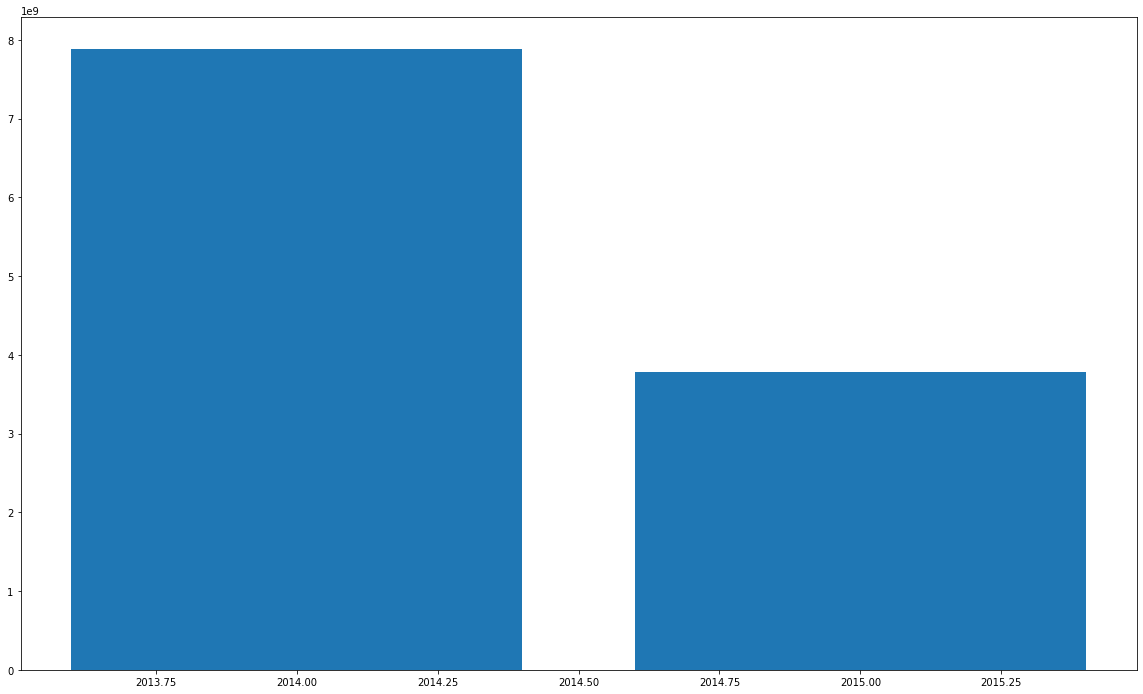

In [ ]:
#First Graph

df2['year'] = pd.to_datetime(df2['date']).dt.year
by_year = df2[['price','year']].groupby('year').sum().reset_index()

plt.figure(figsize = (20,12))
plt.bar(by_year ['year'],by_year ['price'])

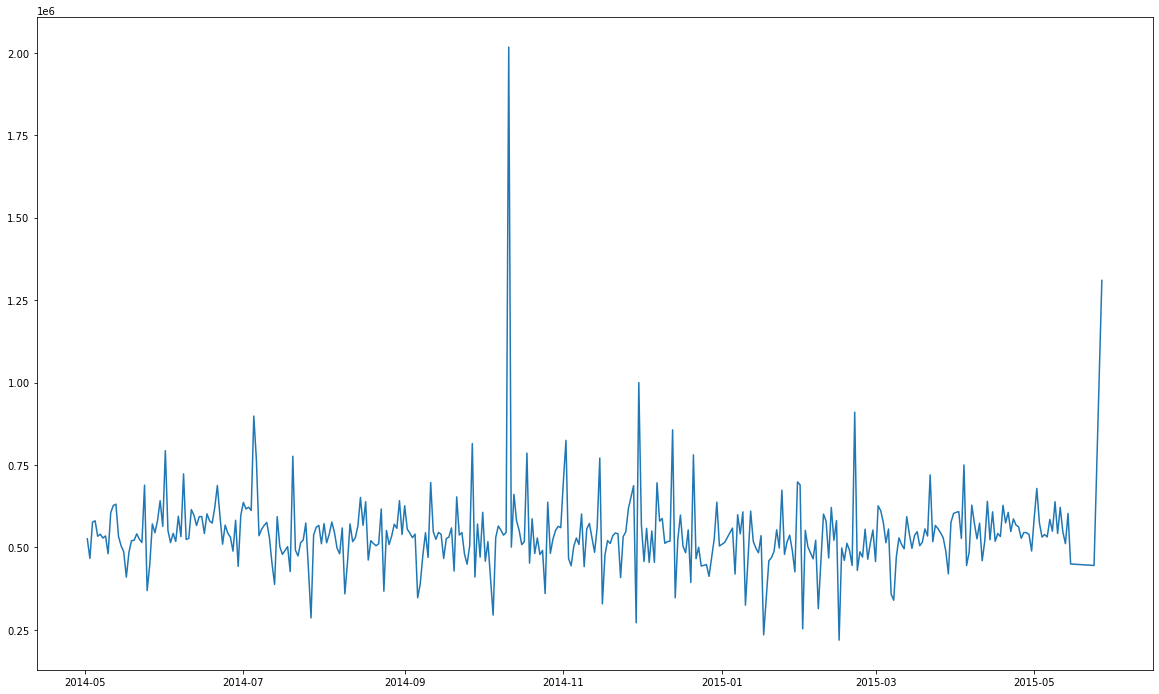

In [ ]:
#second graph

df2['day'] = pd.to_datetime(df2['date'])
by_day = df2[['price','day']].groupby('day').mean().reset_index()

plt.figure(figsize = (20,12))
plt.plot(by_day['day'],by_day['price'])

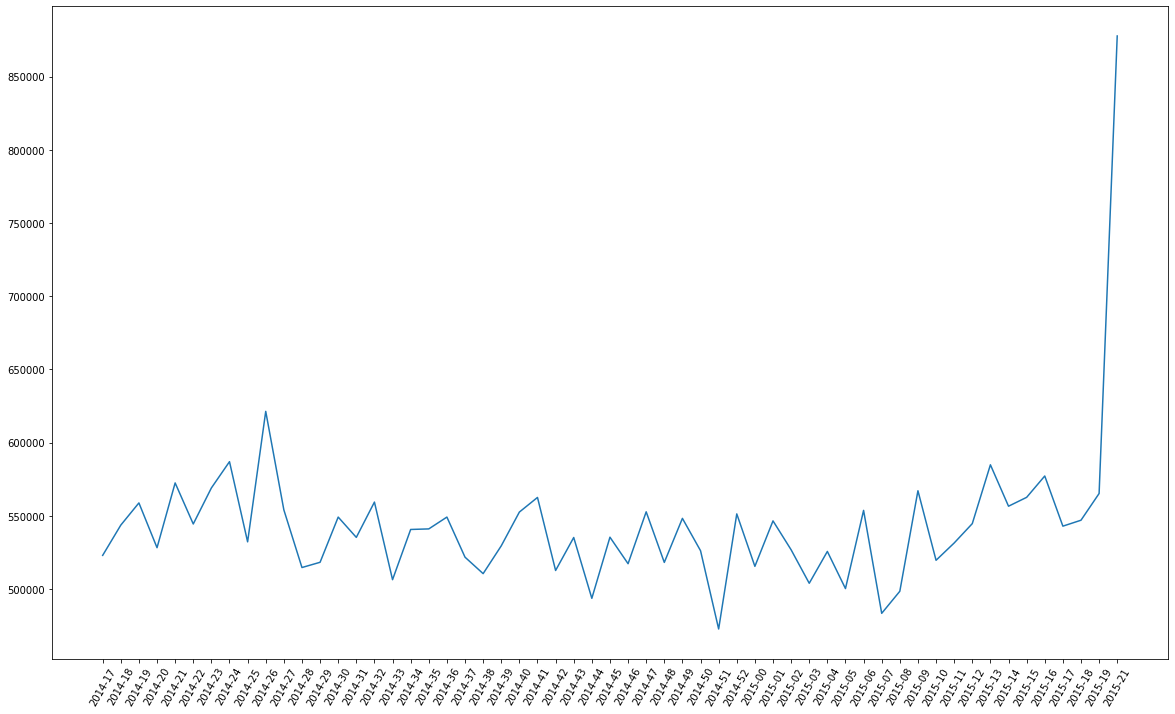

In [ ]:
#third graph

df2['year_week'] = pd.to_datetime(df2['date']).dt.strftime('%Y-%U')
by_year_week = df2[['price','year_week']].groupby('year_week').mean().reset_index()

plt.figure(figsize = (20,12))
plt.plot(by_year_week['year_week'],by_year_week['price'])

plt.xticks(rotation = 60);

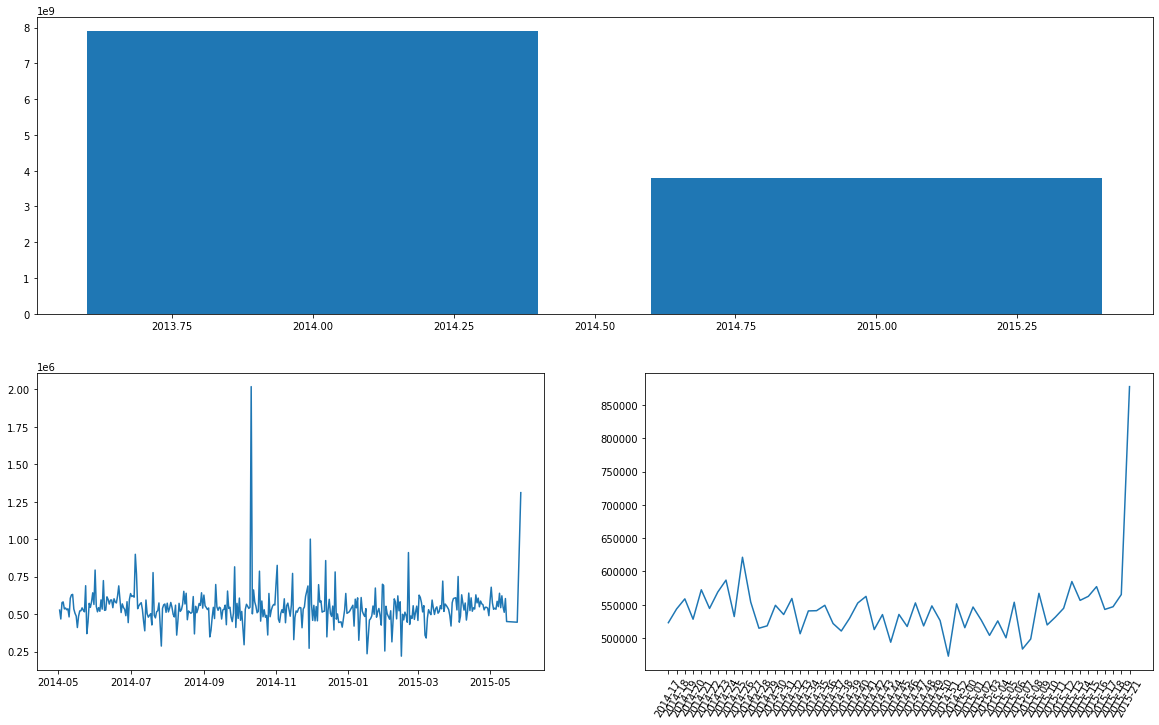

In [ ]:
from matplotlib import gridspec

fig = plt.figure(figsize = (20,12))
specs = gridspec.GridSpec(ncols = 2 ,nrows = 2,figure = fig)

ax1 = fig.add_subplot(specs[0,:]) #first row
ax2 = fig.add_subplot(specs[1,0]) #second row - first column
ax3 = fig.add_subplot(specs[1,1]) #second row  -second column

#primeiro grafico

df2['year'] = pd.to_datetime(df2['date']).dt.year
by_year = df2[['price','year']].groupby('year').sum().reset_index()

ax1.bar(by_year ['year'],by_year ['price'])

#segundo grafico

df2['day'] = pd.to_datetime(df2['date'])
by_day = df2[['price','day']].groupby('day').mean().reset_index()

ax2.plot(by_day['day'],by_day['price'])

#terceiro grafico

df2['year_week'] = pd.to_datetime(df2['date']).dt.strftime('%Y-%U')
by_year_week = df2[['price','year_week']].groupby('year_week').mean().reset_index()

ax3.plot(by_year_week['year_week'],by_year_week['price'])

plt.xticks(rotation = 60);



CREATING A MAP ACCORDINGLY ITS PRICE

In [ ]:
houses = df2[['id','lat','long','price']]

fig = px.scatter_mapbox(houses, lat = 'lat' , lon = 'long',
                  size = 'price',
                  color_continuous_scale = px.colors.cyclical.IceFire,
                  size_max = 15,
                  zoom = 10)
                  

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height = 600,margin = {'r':0,'t':0,'l':0,'b':0})
fig.show()

MAKE A BAR GRAPH THAT REPRESENTS THE SUM OF PRICES BY THE NUMBER OF ROOMS

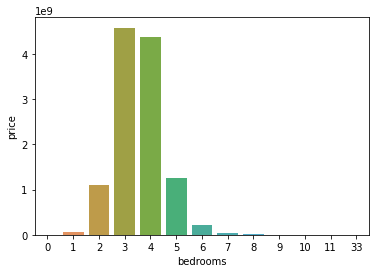

In [ ]:
aux3 = df2[['bedrooms','price']].groupby('bedrooms').sum().reset_index()

sns.barplot(x = 'bedrooms',y = 'price', data = aux3)

MAKE A GRAPH OF LINES THAT REPRESENTS THE AVERAGE OF PRICES BY THE YEAR OF PROPERTY CONSTRUCTION

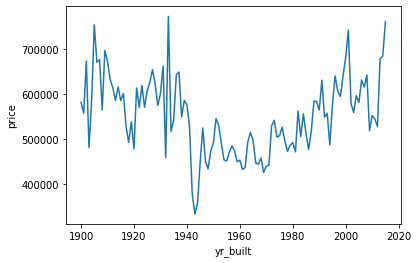

In [ ]:
mean_yr_built = df2[['price','yr_built']].groupby('yr_built').mean().reset_index()

sns.lineplot(x ='yr_built' , y = 'price' ,data = mean_yr_built)

MAKE A BAR GRAPH THAT REPRESENTS THE AVERAGE OF PRICES BY TYPE OF DORMITORY

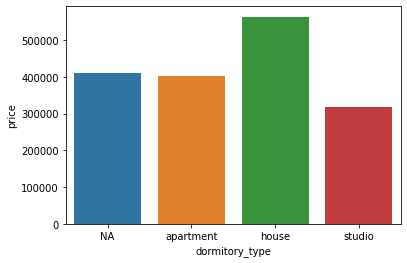

In [ ]:
dormitory_mean = df2[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()

sns.barplot(x = 'dormitory_type',y = 'price' , data = dormitory_mean)



MAKE A LINE GRAPH THAT SHOWS THE EVOLUTION OF AVERAGE PRICES BY THE YEAR OF THE RENOVATION OF PROPERTIES FROM THE YEAR OF 1930

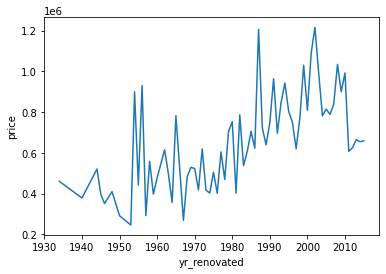

In [ ]:
yr_mean = df.loc[df['yr_renovated'] >1930,['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()

sns.lineplot(x = 'yr_renovated' , y= 'price' , data = yr_mean)

MAKE A TABLE SHOWING AVERAGE PRICES BY YEAR OF CONSTRUCTION AND TYPE OF BEDROOMS IN PROPERTY


In [ ]:
df2[['yr_built','dormitory_type','price']].groupby(['dormitory_type','price']).mean().reset_index()

,dormitory_type,price,yr_built
0,NA,139950.00,1913.00
1,NA,142000.00,1963.00
2,NA,228000.00,1953.00
3,NA,235000.00,1996.00
4,NA,240000.00,2003.00
...,...,...,...
4901,studio,655000.00,1908.00
4902,studio,655100.00,1922.00
4903,studio,680000.00,1910.00
4904,studio,713000.00,1910.00


CREATE A DASHBOARD WITH THE GRAPHICS OF QUESTIONS 02,03,04( DASHBOARD :1 LINES 2 COLUMN)

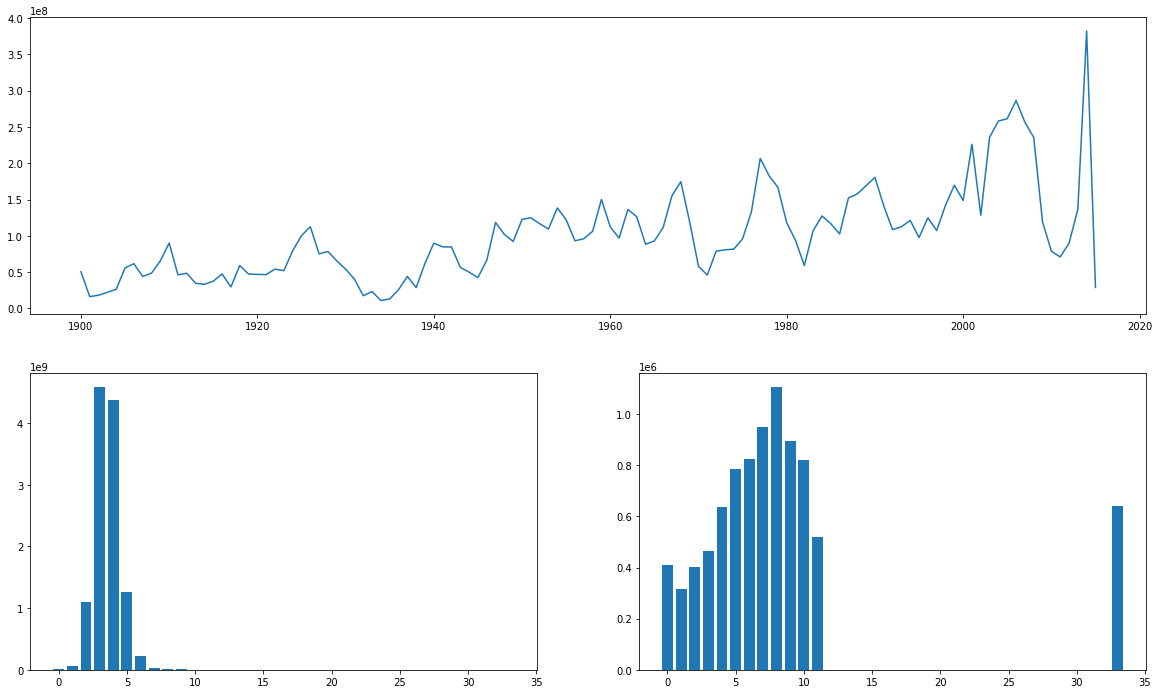

In [ ]:


fig = plt.figure(figsize = (20,12))
specs = gridspec.GridSpec(ncols = 2 ,nrows = 2,figure = fig)

aux1 = fig.add_subplot(specs[0,:]) #first row
aux2 = fig.add_subplot(specs[1,0]) #second row - first column
aux3 = fig.add_subplot(specs[1,1]) #second row  -second column

#questao 02

df = df2[['price','yr_built']].groupby('yr_built').sum().reset_index()

aux1.plot(df['yr_built'] ,df['price']);

#questao 03
df = df2[['price','bedrooms']].groupby('bedrooms').sum().reset_index()

aux2.bar(df['bedrooms'] ,df['price']);


#questao 04
df = df2[['price','bedrooms']].groupby('bedrooms').mean().reset_index()

aux3.bar(df['bedrooms'] ,df['price']);

CREATE A DASHBOARD WITH THE GRAPHICS OF QUESTIONS 02 and 04 ( DASHBOARD 2 COLUMNS)

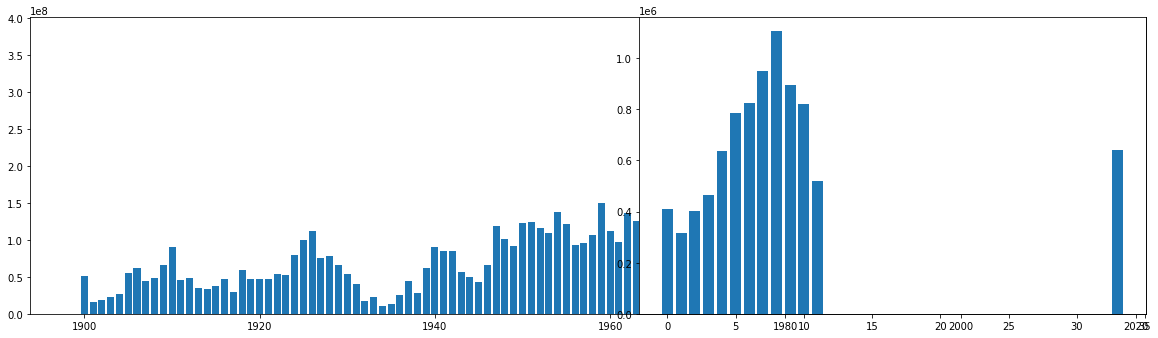

In [ ]:
fig = plt.figure(figsize = (20,12))
specs = gridspec.GridSpec(ncols = 2 ,nrows = 2,figure = fig)

aux1 = fig.add_subplot(specs[0,:]) #first row
aux2 = fig.add_subplot(specs[0,1]) #second row - first column

#questao 02

df = df2[['price','yr_built']].groupby('yr_built').sum().reset_index()

aux1.bar(df['yr_built'] ,df['price']);

#questao 04
df = df2[['price','bedrooms']].groupby('bedrooms').mean().reset_index()

aux2.bar(df['bedrooms'] ,df['price'],data=df);

MAKE A GRAPH WITH THE SIZE OF THE POINTS BEING EQUAL TO THE SIZE OF THE LIVING ROOM

In [ ]:
houses = df2[['id','lat','long','price','sqft_living']].copy()

fig = px.scatter_mapbox(houses, lat = 'lat' , lon = 'long',
                  size = 'sqft_living',
                  color_continuous_scale = px.colors.cyclical.IceFire,
                  size_max = 15,
                  zoom = 10)
                  

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height = 600,margin = {'r':0,'t':0,'l':0,'b':0})
fig.show()

In [ ]:
df3 = df2

ADD THE NAME OF THE FOLLOWING INFORMATION TO THE PROPERTY

- THE NAME OF THE STREET
- THE PROPERTY NUMBER
- THE NAME OF THE NEIGHBORHOOD
- THE NAME OF THE CITY
- THE NAME OF THE STATE


In [ ]:
#initialize Nomination Api

geolocator = Nominatim(user_agent ='geoapiExercises')

In [ ]:
response = geolocator.reverse('47.5112,-122.257')

In [ ]:
response.raw 

{'place_id': 164516375,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 236673600,
 'lat': '47.5112302',
 'lon': '-122.25676111324441',
 'display_name': '10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States',
 'address': {'house_number': '10012',
  'road': '61st Avenue South',
  'neighbourhood': 'Rainier Beach',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'ISO3166-2-lvl4': 'US-WA',
  'postcode': '98178',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['47.511189', '47.5112943', '-122.2568571', '-122.2566651']}

In [ ]:
#creating empty rows

df3['road'] = 'NA'
df3['house_number'] = 'NA'
df3['city'] = 'NA'
df3['country'] = 'NA'
df3['state'] = 'NA'

for i in range(len( df3 )):
  print('Loop:{}/ {}'.format(i, len(df3)))
  
  #make query
  query = str(df3.loc[i,'lat']) + ',' + str(df3.loc[i,'long'])

  #API response

  #populate data

  if 'house_number' in response.raw['address']:
    df3.loc[i,'house_number'] = response.raw['address']['house_number']
    
  if 'road' in response.raw['address']:
    df3.loc[i,'road'] = response.raw['address']['road']

  if 'neighbourhood' in response.raw['address']:
    df3.loc[i,'neighbourhood'] = response.raw['address']['neighbourhood']

  if 'city' in response.raw['address']:
    df3.loc[i,'city'] = response.raw['address']['city']

  if 'county' in response.raw['address']:
    df3.loc[i,'country'] = response.raw['address']['county']
  
  if 'state' in response.raw['address']:
    df3.loc[i,'state'] = response.raw['address']['state']


A saída de streaming foi truncada nas últimas 5000 linhas.
Loop:16613/ 21613
Loop:16614/ 21613
Loop:16615/ 21613
Loop:16616/ 21613
Loop:16617/ 21613
Loop:16618/ 21613
Loop:16619/ 21613
Loop:16620/ 21613
Loop:16621/ 21613
Loop:16622/ 21613
Loop:16623/ 21613
Loop:16624/ 21613
Loop:16625/ 21613
Loop:16626/ 21613
Loop:16627/ 21613
Loop:16628/ 21613
Loop:16629/ 21613
Loop:16630/ 21613
Loop:16631/ 21613
Loop:16632/ 21613
Loop:16633/ 21613
Loop:16634/ 21613
Loop:16635/ 21613
Loop:16636/ 21613
Loop:16637/ 21613
Loop:16638/ 21613
Loop:16639/ 21613
Loop:16640/ 21613
Loop:16641/ 21613
Loop:16642/ 21613
Loop:16643/ 21613
Loop:16644/ 21613
Loop:16645/ 21613
Loop:16646/ 21613
Loop:16647/ 21613
Loop:16648/ 21613
Loop:16649/ 21613
Loop:16650/ 21613
Loop:16651/ 21613
Loop:16652/ 21613
Loop:16653/ 21613
Loop:16654/ 21613
Loop:16655/ 21613
Loop:16656/ 21613
Loop:16657/ 21613
Loop:16658/ 21613
Loop:16659/ 21613
Loop:16660/ 21613
Loop:16661/ 21613
Loop:16662/ 21613
Loop:16663/ 21613
Loop:16664/ 21613
Loop:

ITERATIVE FILTER ON MAP

In [ ]:
houses = df3[['id','lat','long','price']].copy()

#define level

for i in range ( len ( houses )) :
  if houses.loc[i,'price'] <= 321950:
    houses.loc[i, 'level'] = 0

  elif (houses.loc[i,'price'] > 321950) & (houses.loc[i,'price'] > 45000):
    houses.loc[i, 'level'] = 1
  
  
  elif (houses.loc[i,'price'] > 45000) & (houses.loc[i,'price'] > 645000):
    houses.loc[i, 'level'] = 2

  else:
    houses.loc[i,'level'] = 3


houses['level'] = houses['level'].astype (int)


fig = px.scatter_mapbox(houses, lat = 'lat' , lon = 'long',
                  size = 'price',
                  color = 'level',
                  color_continuous_scale = px.colors.cyclical.IceFire,
                  size_max = 15,
                  zoom = 10)
                  

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height = 600,margin = {'r':0,'t':0,'l':0,'b':0})
fig.show()

In [ ]:
df4 = df3

In [ ]:
df4['is_waterfront'] = df4['waterfront'].apply(lambda x :'yes' if x == 1 else 'no')


df4['level'] = df4['price'].apply(lambda x:0 if x == 321950 else
                                          1 if  (x > 312950 ) & (x < 450000) else
                                          2 if  (x> 450000  ) & (x < 645000) else 3)

df4['level'] = df4['level'].astype(int)

style = {'description_width' : 'initial'}

#iterative buttons

price_limit = widgets.IntSlider(
    value = 540000,

    min = 75000,
    max = 77000000,
    step = 1,
    description = 'Maximum_Price',
    disable = False,
    style = style
)

In [ ]:


waterfront_bar = widgets.Dropdown(
    options = df4 ['is_waterfront'].unique().tolist(),
    value = 'yes',
    description = 'Water View',
    disable = False
)

def update_map(df4,waterfront,limit):
  
  houses = df4[(df4['price'] <= limit) & 
               (df4['is_waterfront'] == waterfront)][['id','lat','long','price','level']]

  fig = px.scatter_mapbox(houses, lat = 'lat' , lon = 'long',
                  size = 'price',
                  color = 'level',
                  color_continuous_scale = px.colors.cyclical.IceFire,
                  size_max = 15,
                  zoom = 10)
                  

  fig.update_layout(mapbox_style = 'open-street-map')
  fig.update_layout(height = 600,margin = {'r':0,'t':0,'l':0,'b':0})
  fig.show()

In [ ]:
widgets.interactive (update_map,df4=fixed(df4), waterfront = waterfront_bar, limit = price_limit)

interactive(children=(Dropdown(description='Water View', index=1, options=('no', 'yes'), value='yes'), IntSlid…